In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
topic, edit_method, model = "tmp_places_country_ROME_meta_llama_3.1_8b_instruct_results.json".split('_')[2:5]
topic, edit_method, model

('country', 'ROME', 'meta')

## Multi-turn

In [ ]:
with open('../tmp/tmp2_places_country_ROME_meta_llama_3.1_8b_instruct_results.json', 'r') as file:
    metrics = json.load(file)
metrics[0]

{'pre': {'edit_acc': 0,
  'edit_output': 'Bechuanaland',
  'edit_acc_multi_turn': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'edit_output_multi_turn': ['Bechuanaland',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes'],
  'locality': {'locality_output': ['Gaborone']},
  'portability': {},
  'yes_questions': {'yes_acc': [1], 'yes_output': ['Yes']},
  'no_questions': {'no_acc': [0], 'no_output': ['Yes']},
  'multiple_choice_questions': {'multiple_choice_acc': [0],
   'multiple_choice_output': ['Bechuanaland']},
  'reversed_relation_questions': {'reversed_relation_acc': [0],
   'reversed_relation_output': ['Ireland']},
  'questions_2hop': {'2hop_acc': [1], '2hop_output': ['South Africa']},
  'questions_3hop': {'3hop_acc': [0], '3hop_output': ['South Africa']},
  'questions_4hop': {'4hop_acc': [0], '4hop_output': ['English']},
  'questions_5hop': {'5hop_acc': [0], '5hop_output': ['South Africa']},
  'questions_6hop': {'6hop_acc': [1], '6hop_output

In [2]:
import matplotlib.pyplot as plt

def plot_multi_turn(metrics):
    multi_turn_ls_pre, multi_turn_ls_post = [], []
    for e in metrics:
        multi_turn_ls_pre.append(e['pre']['edit_acc_multi_turn'])
        multi_turn_ls_post.append(e['post']['edit_acc_multi_turn'])
    multi_turn_ls_avg_pre = np.mean(multi_turn_ls_pre, axis=0)[1:]
    multi_turn_ls_avg_post = np.mean(multi_turn_ls_post, axis=0)[1:]

    # plt.figure(figsize=(10, 6))
    plt.plot(multi_turn_ls_avg_pre, label='Pre-edit')
    plt.plot(multi_turn_ls_avg_post, label='Post-edit')
    plt.xlabel('Turn')
    plt.ylabel('Edit Accuracy')
    plt.legend()
    plt.show()

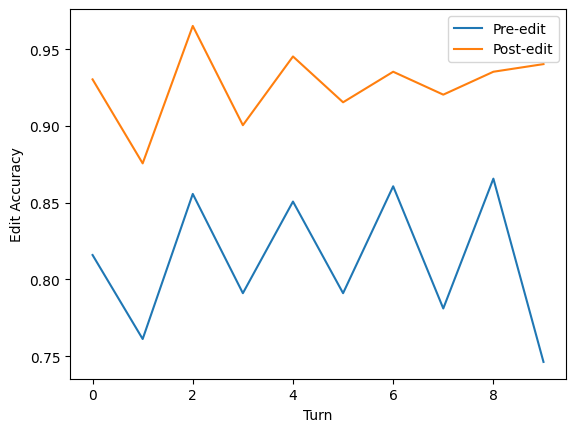

In [20]:
with open('../tmp/multi_turn_1_places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

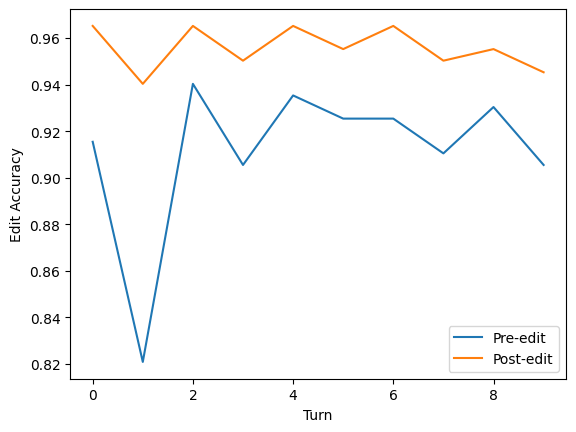

In [21]:
with open('../tmp/multi_turn_2_places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

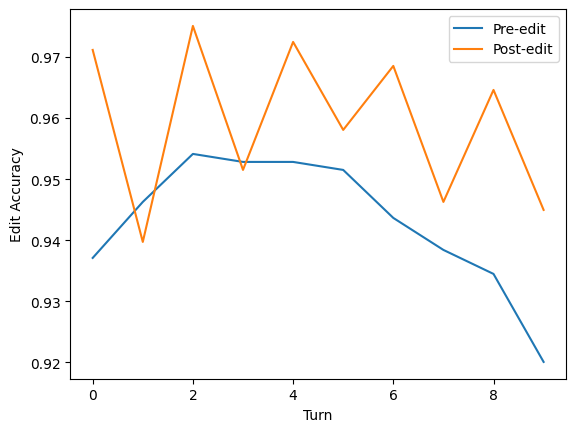

In [12]:
with open('../tmp/places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

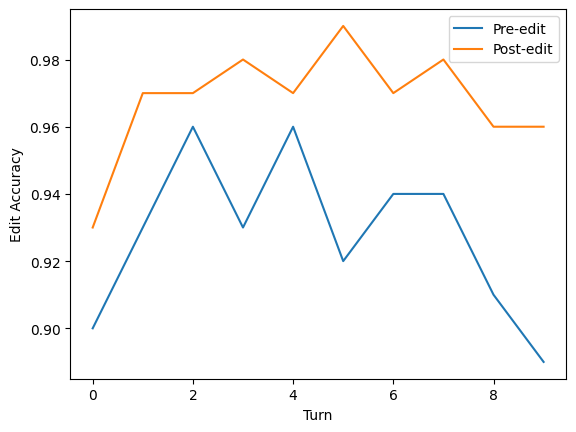

In [3]:
with open('../results/meta_llama_3.1_8b_instruct/places_country_ROME.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

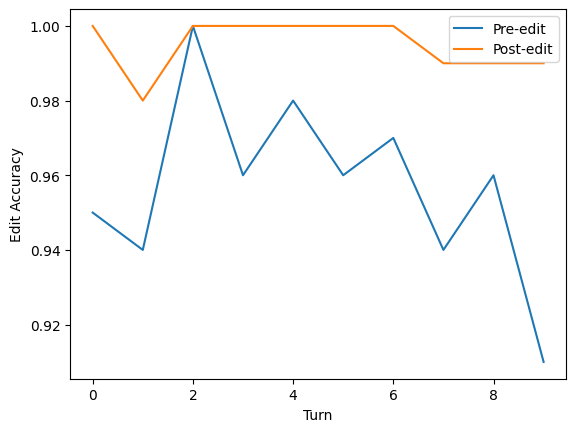

In [6]:
with open('../results/meta_llama_3.1_8b_instruct/technology_software_ROME.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

## Table Summary

In [5]:
def get_avg_std(metric_list, percent=100, std_flag=False):
    mean_val = np.mean(metric_list)
    std_val = np.std(metric_list)
    if std_flag:
        return f"{mean_val*percent:.2f}±{std_val:.2f}"
    else:
        return np.round(mean_val*percent, 2)


def summarize_results(json_folder, std_flag=False):
    metrics_ls, metrics_ls_multi_hop = [], []

    for filename in sorted(os.listdir(json_folder)):
        if filename.endswith('.json') and 'multi_turn' not in filename:
            filepath = os.path.join(json_folder, filename)
            # print(filepath)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                topic, edit_method = ' '.join(filename.split('_')[:2]), filename.split('_')[2:][0].replace('.json', '')

                results = {
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                    "rephrase_pre": get_avg_std([e['pre']['rephrase_acc'][0] for e in metrics]),
                    "rephrase_post": get_avg_std([e['post']['rephrase_acc'][0] for e in metrics]),
                    "yes_pre": get_avg_std([e['pre']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "yes_post": get_avg_std([e['post']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "no_pre": get_avg_std([e['pre']['no_questions']['no_acc'][0] for e in metrics]),
                    "no_post": get_avg_std([e['post']['no_questions']['no_acc'][0] for e in metrics]),
                    "mc_pre": get_avg_std([e['pre']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "mc_post": get_avg_std([e['post']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "reversed_pre": get_avg_std([e['pre']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "reversed_post": get_avg_std([e['post']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "locality_post": get_avg_std([e['post']['locality'][f'locality_acc'][0] for e in metrics]),
                }

                results_multi_hop = {
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "questions_2hop_pre": get_avg_std([e['pre']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_2hop_post": get_avg_std([e['post']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_3hop_pre": get_avg_std([e['pre']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_3hop_post": get_avg_std([e['post']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_4hop_pre": get_avg_std([e['pre']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_4hop_post": get_avg_std([e['post']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_5hop_pre": get_avg_std([e['pre']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_5hop_post": get_avg_std([e['post']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_6hop_pre": get_avg_std([e['pre']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                    "questions_6hop_post": get_avg_std([e['post']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                }
                metrics_ls.append(results)
                metrics_ls_multi_hop.append(results_multi_hop)
    df = pd.DataFrame(metrics_ls)
    df_multi_hop = pd.DataFrame(metrics_ls_multi_hop)
    # df['edit_method'] = pd.Categorical(df['edit_method'], ["ROME", "FT-M", "ICL"])
    # df['Gene_increase'] = df.apply(lambda x: x['Generalization_post'] - x['Generalization_pre'], axis=1)
    # df['Port_increase'] = df.apply(lambda x: x['Portability_post'] - x['Portability_pre'], axis=1)
    # return df[['edit_method', 'model', 'Reliability_pre', 'Reliability_post', 'Reli_increase', 'Generalization_pre', 
    #            'Generalization_post', 'Gene_increase', 'Portability_pre', 'Portability_post', 'Port_increase']]
    return df, df_multi_hop


def plot_efficacy(df):
    # plot the efficacy by topic and edit method
    plt.figure(figsize=(10, 5))

    # Create a custom color palette
    colors = sns.color_palette("husl", n_colors=len(df.edit_method.unique()))
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.7)

    plt.legend(title='Edit Method', bbox_to_anchor=(0.5, 1.07), loc='lower center', ncol=len(df.edit_method.unique()))
    plt.title('Efficacy by Topic and Edit Method')
    plt.xlabel('Topic')
    plt.ylabel('Efficacy Post')
    plt.xticks(rotation=20, ha='right')  # Rotate x-axis labels for better readability

    # Add value labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, padding=3)  # , rotation=90

    plt.tight_layout()
    plt.show()

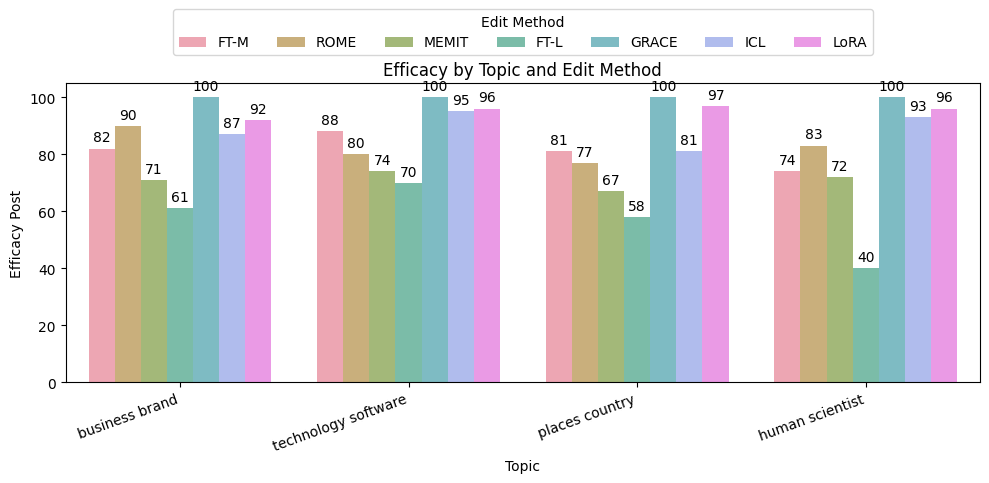

In [ ]:
df, df_multi_hop = summarize_results("../results/meta_llama_3.1_8b_instruct")
# df.sort_values(by=['topic', 'edit_method'])
plot_efficacy(df)

In [8]:
df.sort_values(by=['topic', 'edit_method'])

,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
10,business brand,FT-L,0.0,61.0,11.0,61.0,66.0,43.0,26.0,11.0,30.0,34.0,6.0,1.0,18.0
0,business brand,FT-M,0.0,82.0,11.0,76.0,66.0,57.0,26.0,21.0,30.0,30.0,6.0,1.0,54.0
5,business brand,GRACE,2.0,100.0,4.0,4.0,66.0,66.0,26.0,26.0,30.0,30.0,6.0,6.0,100.0
15,business brand,ICL,0.0,87.0,11.0,84.0,66.0,86.0,26.0,56.0,30.0,83.0,6.0,63.0,54.0
16,business brand,LoRA,0.0,92.0,11.0,91.0,66.0,72.0,26.0,18.0,30.0,63.0,6.0,7.0,30.0
12,business brand,MEMIT,9.0,71.0,15.0,67.0,59.0,81.0,29.0,30.0,35.0,65.0,8.0,8.0,24.0
11,business brand,ROME,0.0,90.0,11.0,83.0,66.0,94.0,26.0,30.0,29.0,65.0,6.0,8.0,30.0
3,human scientist,FT-L,0.0,40.0,9.0,41.0,80.0,45.0,13.0,5.0,36.0,34.0,4.0,1.0,8.0
18,human scientist,FT-M,0.0,74.0,9.0,70.0,80.0,76.0,13.0,10.0,36.0,37.0,4.0,3.0,56.0
7,human scientist,GRACE,5.0,100.0,1.0,1.0,80.0,80.0,13.0,13.0,36.0,36.0,4.0,4.0,100.0


In [ ]:
# next step
# change the color of the bars, then chagne the alpha transparency of the filling color of bars, and add edgecolor for bars using the same color map

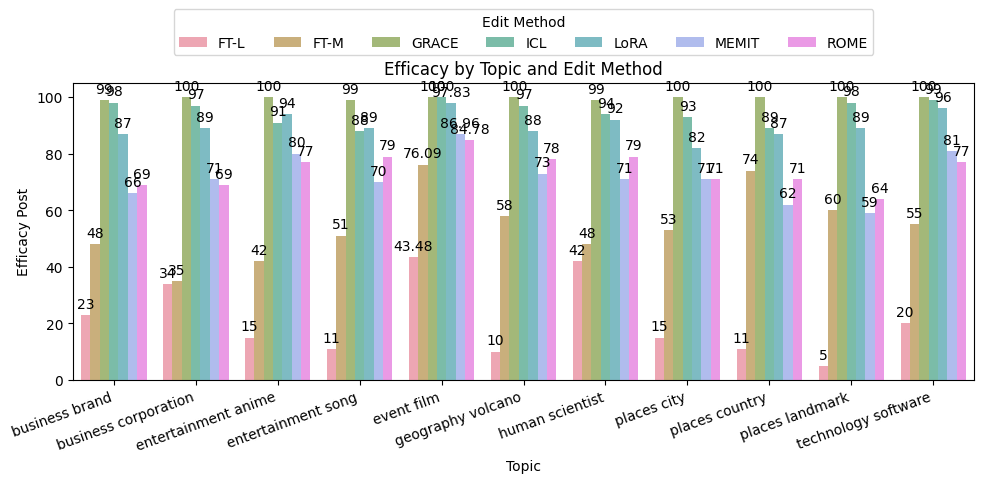

In [8]:
df, df_multi_hop = summarize_results("../results/mistral_7b_instruct_v0.3")
# df.sort_values(by=['topic', 'edit_method'])
plot_efficacy(df)

In [5]:
df.sort_values(by=['topic', 'edit_method'])

,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
24,business brand,FT-L,0.0,23.0,13.0,21.0,53.0,7.0,30.0,6.0,56.0,34.0,3.0,0.0,0.0
2,business brand,FT-M,0.0,48.0,13.0,39.0,53.0,53.0,30.0,29.0,56.0,56.0,3.0,4.0,86.0
16,business brand,GRACE,0.0,99.0,0.0,0.0,53.0,53.0,30.0,30.0,56.0,56.0,3.0,3.0,100.0
40,business brand,ICL,0.0,98.0,13.0,98.0,53.0,97.0,30.0,65.0,56.0,88.0,3.0,71.0,49.0
44,business brand,LoRA,0.0,87.0,13.0,85.0,53.0,14.0,30.0,9.0,56.0,42.0,3.0,7.0,5.0
15,business brand,MEMIT,0.0,66.0,13.0,59.0,53.0,71.0,30.0,29.0,56.0,61.0,3.0,2.0,21.0
26,business brand,ROME,0.0,69.0,13.0,65.0,53.0,76.0,30.0,35.0,56.0,72.0,3.0,2.0,27.0
7,business corporation,FT-L,0.0,34.0,5.0,37.0,47.0,6.0,28.0,6.0,52.0,38.0,5.0,2.0,2.0
34,business corporation,FT-M,0.0,35.0,5.0,29.0,47.0,47.0,28.0,29.0,52.0,52.0,5.0,4.0,87.0
22,business corporation,ICL,0.0,97.0,5.0,99.0,47.0,97.0,28.0,72.0,52.0,90.0,5.0,81.0,50.0


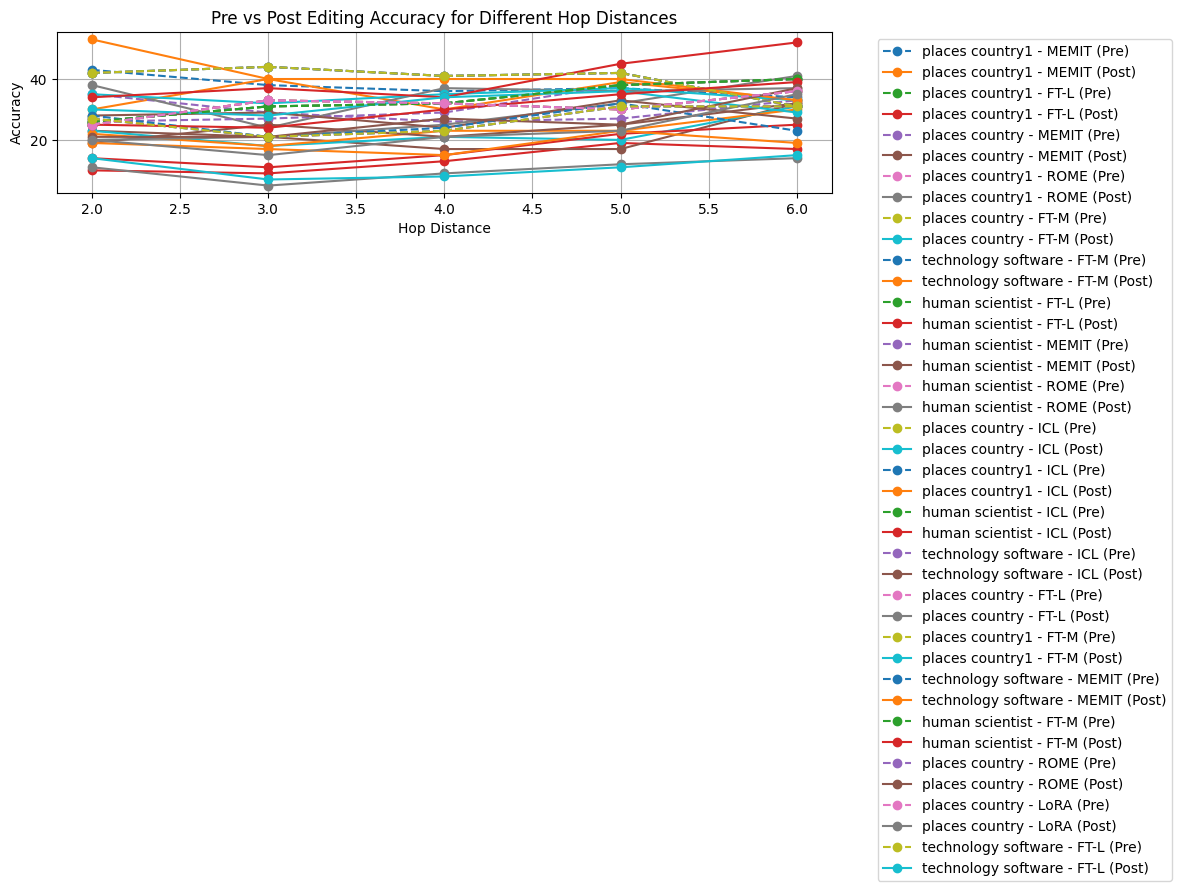

In [12]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3.1_8b_instruct")
plt.figure(figsize=(12, 6))

for index, row in df_multi_hop.iterrows():
    label = f"{row['topic']} - {row['edit_method']}"
    
    pre_values = [row[f'questions_{i}hop_pre'] for i in range(2, 7)]
    post_values = [row[f'questions_{i}hop_post'] for i in range(2, 7)]
    
    plt.plot(range(2, 7), pre_values, marker='o', linestyle='--', label=f"{label} (Pre)")
    plt.plot(range(2, 7), post_values, marker='o', label=f"{label} (Post)")

plt.xlabel('Hop Distance')
plt.ylabel('Accuracy')
plt.title('Pre vs Post Editing Accuracy for Different Hop Distances')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [9]:
# Check if all the multiple choice output are single letter
with open('../tmp/places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
for e in metrics:
    if len(e['post']['multiple_choice_questions']['multiple_choice_output']) != 1 or len(e['pre']['multiple_choice_questions']['multiple_choice_output']) != 1:
        print(e)

## Misc

In [ ]:
def summarize_results_simple(json_folder, std_flag=False):
    metrics_ls, metrics_ls_multi_hop = [], []

    for filename in os.listdir(json_folder):
        if filename.endswith('GRACE.json') and 'multi_turn' not in filename:
            filepath = os.path.join(json_folder, filename)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                topic, edit_method = ' '.join(filename.split('_')[:2]), filename.split('_')[2:][0].replace('.json', '')
                results = {
                    "topic": topic,
                    "edit_method": edit_method,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                }
                metrics_ls.append(results)
    df = pd.DataFrame(metrics_ls)
    return df
df = summarize_results_simple('../tmp')
df

In [ ]:
with open('../tmp/human_scientist_GRACE.json', 'r') as file:
    metrics = json.load(file)
    results_ls = []
    for e in metrics:
        results = {
            "efficacy_post": e['post']['edit_acc'][0],
            "pre_output": e['pre']['edit_output'][0],
            "post_output": e['post']['edit_output'][0],
            "ground_truth": e['requested_edit']['target_new'],
        }
        results_ls.append(results)
tmp = pd.DataFrame(results_ls)
tmp

In [62]:
tmp[tmp['pre_output'] != tmp['post_output']].shape

(0, 4)